# Building a classification model for Cardiac Arrest Prediction 

In [311]:
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [312]:
data=pd.read_csv('cardio_train.csv')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [313]:
data=data.drop_duplicates()
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [314]:
data=data.drop(['id','active'],axis=1)

In [315]:
data.age=round(data.age/365)

<AxesSubplot:>

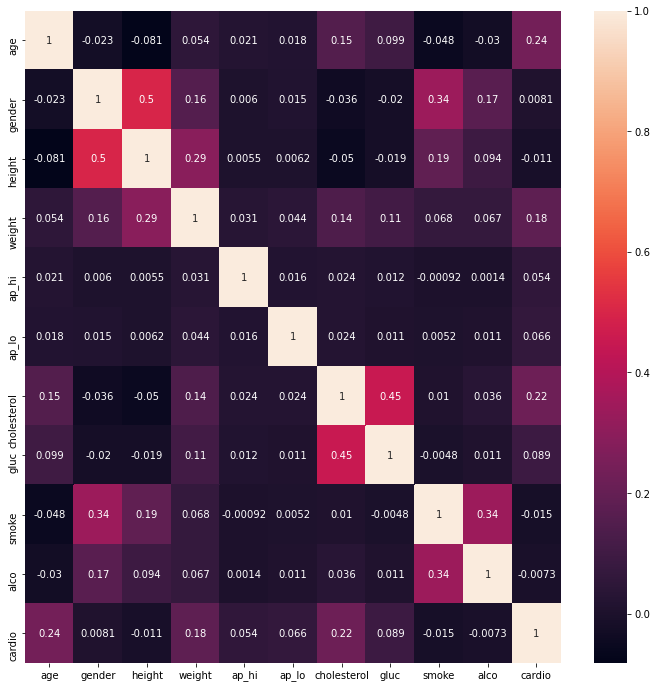

In [316]:
cm=data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cm,annot=True)

In [317]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.499700
std,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000


In [318]:
data=data[data['ap_hi']>0]

In [319]:
data=data[data['ap_lo']>0]
data=data[data['ap_hi']<250]
data=data[data['ap_hi']>60]
data=data[data['ap_lo']<150]
data=data[data['ap_lo']>50]

## Univariate analyasis

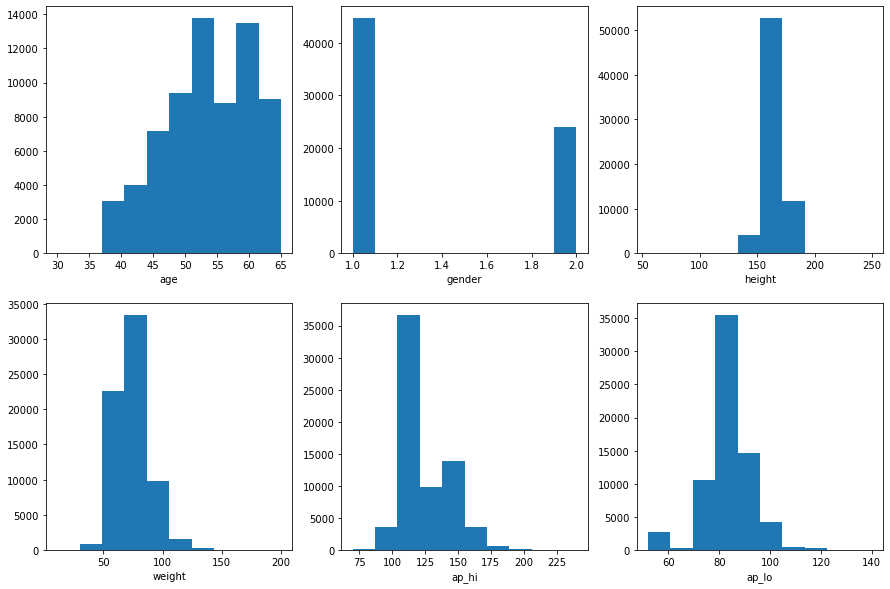

In [320]:
col=data.columns
plt.figure(figsize=(15,10))
for i in range(len(col)-5):
    plt.subplot(2,3,i+1)
    plt.hist(data[col[i]])
    plt.xlabel(col[i])
    

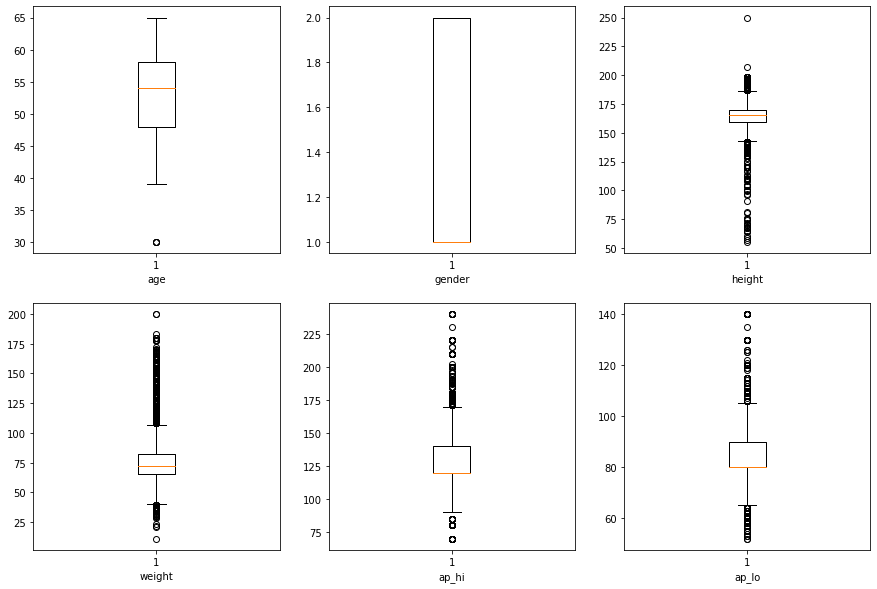

In [321]:
col=data.columns
plt.figure(figsize=(15,10))
for i in range(len(col)-5):
    plt.subplot(2,3,i+1)
    plt.boxplot(data[col[i]])
    plt.xlabel(col[i])

## Result of Univariate Analysis
* By observing the histogram and box plot there are more no of outliars are present in Height, Weight, ap_hi, ap_lo.
* out of which ap_hi and ap_lo has insignificant kind of outliars.
* To deal with this here i am using 3rd standard deviation

### 3 standard deviation removal

In [322]:
upper_limit= data.weight.mean() + 2*data.weight.std()
print(upper_limit)
lower_limit= data.weight.mean() - 2*data.weight.std()
lower_limit

102.78225468596358


45.47930259440224

In [323]:
data=data[data['weight']<upper_limit] 

In [324]:
data=data[data['weight']>lower_limit]

In [325]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio
count,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000
mean,53.329397,1.346285,164.272906,72.705122,126.259908,81.206911,1.354249,1.218566,0.086743,0.052220,0.488299
std,6.762154,0.475789,8.023614,11.684446,16.429007,9.357428,0.671184,0.564659,0.281460,0.222471,0.499867
min,30.000000,1.000000,55.000000,46.000000,70.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,165.000000,71.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,58.000000,2.000000,170.000000,80.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,65.000000,2.000000,250.000000,102.000000,240.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000


In [326]:
upper_limit= data.height.mean() + 2*data.height.std()
print('upper limit: ',upper_limit)
lower_limit= data.height.mean() - 2*data.height.std()
print('Lower limit: ',lower_limit)

data=data[data['height']<upper_limit]
data=data[data['height']>lower_limit]


upper limit:  180.3201350236403
Lower limit:  148.22567733333912


In [327]:
upper_limit= data.ap_hi.mean() + 3*data.ap_hi.std()
print('upper limit: ',upper_limit)
lower_limit= data.ap_hi.mean() - 3*data.ap_hi.std()
print('Lower limit: ',lower_limit)

data=data[data['ap_hi']<upper_limit]
data=data[data['ap_hi']>lower_limit]


upper limit:  175.38118514994753
Lower limit:  77.03762946610487


In [328]:
upper_limit= data.ap_lo.mean() + 3*data.ap_lo.std()
print('upper limit: ',upper_limit)
lower_limit= data.ap_lo.mean() - 3*data.ap_lo.std()
print('Lower limit: ',lower_limit)

data=data[data['ap_lo']<150]
data=data[data['ap_lo']>50]

upper limit:  108.0428134621655
Lower limit:  53.853599480626855


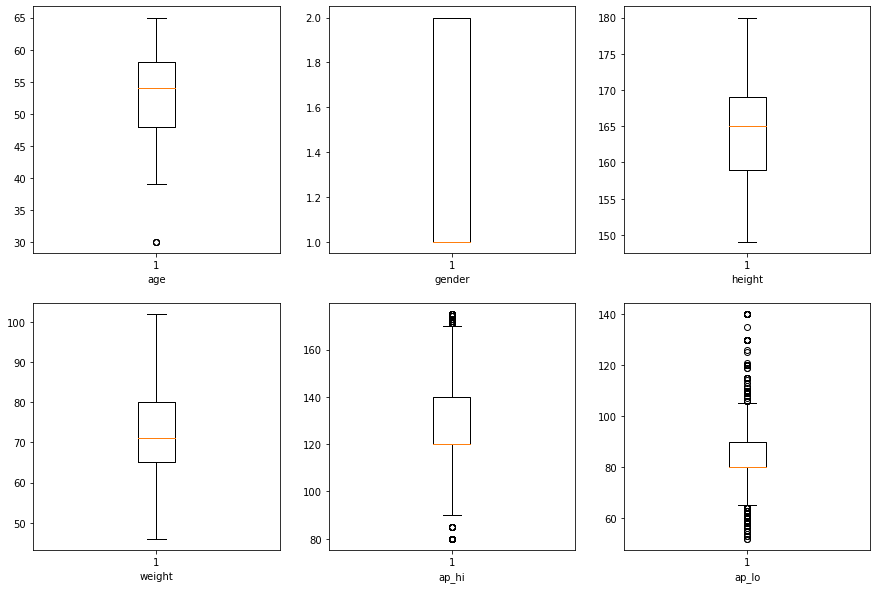

In [329]:
col=data.columns
plt.figure(figsize=(15,10))
for i in range(len(col)-5):
    plt.subplot(2,3,i+1)
    plt.boxplot(data[col[i]])
    plt.xlabel(col[i])

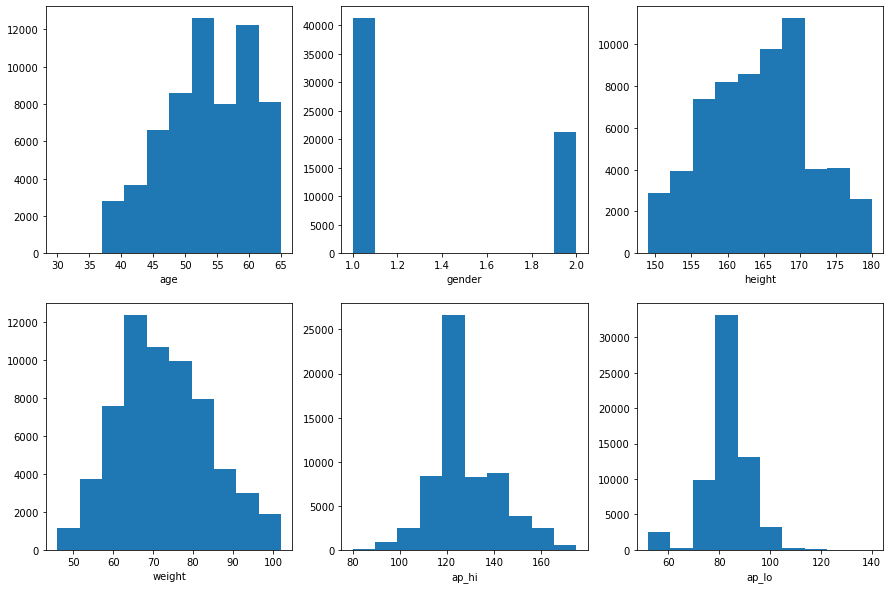

In [330]:
col=data.columns
plt.figure(figsize=(15,10))
for i in range(len(col)-5):
    plt.subplot(2,3,i+1)
    plt.hist(data[col[i]])
    plt.xlabel(col[i])

In [331]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio
count,62614.000000,62614.000000,62614.000000,62614.000000,62614.000000,62614.000000,62614.000000,62614.000000,62614.000000,62614.000000,62614.000000
mean,53.287747,1.340467,164.282333,72.544897,125.528332,80.948206,1.349858,1.217603,0.085013,0.051282,0.483167
std,6.760275,0.473870,6.940064,11.540075,15.112495,9.031536,0.668079,0.564074,0.278903,0.220575,0.499721
min,30.000000,1.000000,149.000000,46.000000,80.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,165.000000,71.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,58.000000,2.000000,169.000000,80.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,65.000000,2.000000,180.000000,102.000000,175.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000


## Building the model

In [332]:
y=data.cardio

In [333]:
x=data.drop(['cardio'],axis=1)

In [334]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco
0,50.0,2,168,62.0,110,80,1,1,0,0
1,55.0,1,156,85.0,140,90,3,1,0,0
2,52.0,1,165,64.0,130,70,3,1,0,0
3,48.0,2,169,82.0,150,100,1,1,0,0
4,48.0,1,156,56.0,100,60,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
69993,54.0,1,172,70.0,130,90,1,1,0,0
69994,58.0,1,165,80.0,150,80,1,1,0,0
69995,53.0,2,168,76.0,120,80,1,1,1,0
69998,61.0,1,163,72.0,135,80,1,2,0,0


In [335]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [336]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=True)

In [337]:
model=GradientBoostingClassifier()

In [338]:
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [339]:
pred=model.predict(x_test)

In [340]:
accuracy_score(y_test,pred)

0.7316459371824033

In [341]:
confusion_matrix(y_test,pred)

array([[8514, 2274],
       [3271, 6604]], dtype=int64)

In [342]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75     10788
           1       0.74      0.67      0.70      9875

    accuracy                           0.73     20663
   macro avg       0.73      0.73      0.73     20663
weighted avg       0.73      0.73      0.73     20663



In [49]:
pred=model.predict([[53.0,2,168,76.0,120,80,1,1,0,1]])

In [50]:
pickle.dump(model,open('Healthcare.pkl','wb'))

In [51]:
mdl=pickle.load(open('Healthcare.pkl','rb'))

In [52]:
mdl.predict([[53.0,2,168,76.0,120,80,1,1,0,1]])

array([0], dtype=int64)